In [1]:
import ROOT as r

Welcome to JupyROOT 6.12/07


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.ROOT)

In [3]:
def get_bias(fname, val=1):
    rfile = r.TFile.Open(fname)
    rtree = rfile.Get("limit")
    vals = []
    for i in range(rtree.GetEntries()):
        rtree.GetEntry(i)
        mu = rtree.limit
        errmu = rtree.limitErr
        #print(i, mu, errmu)
        if errmu != 0:
            vals.append((mu-val)/errmu)
    return np.array(vals)

In [4]:
mu = 100
year = 2017
ys = str(year)[-2:]
goftoys = get_bias('Ref{}/fresults_base_{}_0-20-1.root'.format(ys, mu), mu)
goftoys2 = get_bias('Ref{}CC/fresults_alt_{}_0-20-1.root'.format(ys, mu), mu)
x = np.linspace(-4, 6, 200)
bins = np.linspace(-4, 4, 20)
fig, ax = plt.subplots()

from scipy.stats import norm
a, b = norm.fit(goftoys)

fi1 = ax.plot(
    x,
    norm(a).pdf(x) * len(goftoys) * (bins[1] - bins[0]),
    'k-',
    lw=2,
    color='black', ls='--',
    label=r'$\bar{x}=$' + '{:.3f}\n'.format(a) + r'$\sigma_x=$' + '{:.3f}'.format(b),
)
hi1 = ax.hist(goftoys,
        histtype='step',
        bins=bins,
        lw=2,
        label='Reference fits\n(Bernstein)\nN = {}'.format(len(goftoys)),
        color='black')

a, b = norm.fit(goftoys2)
fi2 = ax.plot(
    x,
    norm(a).pdf(x) * len(goftoys) * (bins[1] - bins[0]),
    'k-',
    lw=2,
    color='blue', ls='--',
    label=r'$\bar{x}=$' + '{:.3f}\n'.format(a) + r'$\sigma_x=$' + '{:.3f}'.format(b),
    
)
hi2 = ax.hist(goftoys2,
        histtype='step',
        bins=bins,
        lw=2,
        label='Generating fits\n(Chebyshev)\nN = {}'.format(len(goftoys)),
        color='blue')

l1 = ax.legend(title=r'$\mu(H)=${}'.format(mu), loc=0)
for t in l1.texts: t.set_multialignment('center');
ax.axvline(0, ls='--', color='red', alpha=1)
ax.set_xlabel(r"$\frac{\hat{\mu}-\mu}{\sigma_\mu}$", x=1, ha='right')
ax.set_ylabel("Pseudoexperiments")
hep.cms.label(year=year, data=True)

ReferenceError: attempt to access a null-pointer

Error in <TFile::TFile>: file Ref17/fresults_base_100_0-20-1.root does not exist


In [ ]:
mus = [0, 1] + range(5, 105, 5)
means_ref = []
means_alt = []
for mu in mus:
    means_ref.append(np.mean(get_bias('Ref18/fresults_base_{}_0-20-1.root'.format(mu), mu)))
    means_alt.append(np.mean(get_bias('Ref18CC/fresults_alt_{}_0-20-1.root'.format(mu), mu)))
    
plt.scatter(mus, means_ref, color='black', label='Reference Fit')
plt.scatter(mus, means_alt, color='red', label='Generating Fit')
plt.ylim(-1, 1)
plt.axhline(0, color='black', ls='--', alpha=0.5)
plt.xlabel("$\mu(H)$", x=1, ha='right')
plt.ylabel(r"$\overline{\frac{\hat{\mu}-\mu}{\sigma_\mu}}$", y=1, ha='right')
plt.legend(title='Chebyshev')
hep.cms.label(data=True, year=2018)

In [ ]:
mus = [0, 1] + range(5, 105, 5)
means_ref = []
means_alt = []
for mu in mus:
    means_ref.append(np.mean(get_bias('Ref18/fresults_baseRef18tt_{}_0-20-1.root'.format(mu), mu)))
    means_alt.append(np.mean(get_bias('Ref18tt/fresults_alt_{}_0-20-1.root'.format(mu), mu)))
    
plt.scatter(mus, means_ref, color='black', label='Reference Fit')
plt.scatter(mus, means_alt, color='red', label='Generating Fit')
plt.ylim(-1, 1)
plt.axhline(0, color='black', ls='--', alpha=0.5)
plt.xlabel("$\mu(H)$", x=1, ha='right')
plt.ylabel(r"$\overline{\frac{\hat{\mu}-\mu}{\sigma_\mu}}$", y=1, ha='right')
plt.legend(title='Exponential')
hep.cms.label(data=True, year=2018)

In [ ]:
mus = [0, 1] + range(5, 105, 5)
for year, col in zip([2016, 2017, 2018], ['blue', 'green', 'red']):
    year = str(year)
    ys = year[-2:]
    means = []
    for mu in mus:
        means.append(np.mean(get_bias('Ref{}/bias{}.root'.format(ys, mu), mu)))
    
    plt.scatter(mus, means, color=col, label='Mean bias - {}'.format(year))
plt.ylim(-1, 1)
plt.axhline(0, color='black', ls='--', alpha=0.5)
plt.xlabel("$\mu(H)$", x=1, ha='right')
plt.ylabel(r"$\overline{\frac{\hat{\mu}-\mu}{\sigma_\mu}}$", y=1, ha='right')
plt.legend()

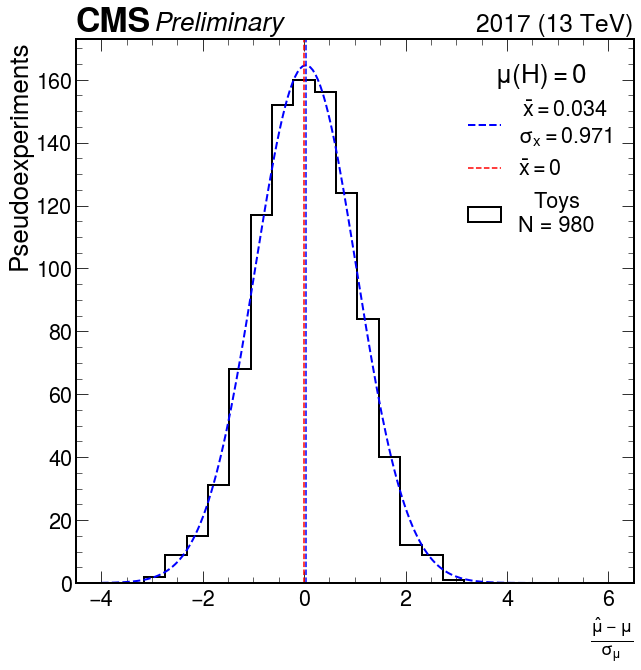

In [16]:
mu = 0
year = 2017
ys = str(year)[-2:]
goftoys = get_bias('Ref{}/biastfFr{}.root'.format(ys, mu), mu)
x = np.linspace(-4, 6, 200)
bins = np.linspace(-4, 4, 20)
fig, ax = plt.subplots()

from scipy.stats import norm
a, b = norm.fit(goftoys)

fi1 = ax.plot(
    x,
    norm(a).pdf(x) * len(goftoys) * (bins[1] - bins[0]),
    'k-',
    lw=2,
    color='blue', ls='--',
    label=r'$\bar{x}=$' + '{:.3f}\n'.format(a) + r'$\sigma_x=$' + '{:.3f}'.format(b),
)
hi1 = ax.hist(goftoys,
        histtype='step',
        bins=bins,
        lw=2,
        #label='Reference fits\n(Bernstein)\nN = {}'.format(len(goftoys)),
        label='Toys\nN = {}'.format(len(goftoys)),
        color='black')

ax.axvline(0, ls='--', color='red', alpha=1, label=r'$\bar{x}=$0')
ax.axvline(a, ls='--', color='blue', alpha=1)

l1 = ax.legend(title=r'$\mu(H)=${}'.format(mu), loc=0)
for t in l1.texts: t.set_multialignment('center');
ax.set_xlabel(r"$\frac{\hat{\mu}-\mu}{\sigma_\mu}$", x=1, ha='right')
ax.set_ylabel("Pseudoexperiments", ha='right', y=1)

hep.cms.label(year=year, data=True)
suff = "tf"
fig.savefig('bplots/single_bias_{}_{}_{}.pdf'.format(year, mu, suff), transparent=True, dpi=300, bbox_inches='tight')
fig.savefig('bplots/single_bias_{}_{}_{}.png'.format(year, mu, suff), transparent=True, dpi=300, bbox_inches='tight')

In [ ]:
mus = [0, 1] + range(5, 105, 5)
year = 2017
for ext, col, leg in zip(["", "set"], ['blue', 'green'], ["toysMC", "toysMC - set TF params"]):
    year = str(year)
    ys = year[-2:]
    means = []
    for mu in mus:
        try:
            means.append(np.mean(get_bias('Ref17/bias{}{}.root'.format(ext, mu), mu)))
        except:
            means.append(np.nan)
    
    plt.scatter(mus, means, color=col, label='Mean bias - {}'.format(leg))
plt.ylim(-1, 1)
plt.axhline(0, color='black', ls='--', alpha=0.5)
plt.xlabel("$\mu(H)$", x=1, ha='right')
plt.ylabel(r"$\overline{\frac{\hat{\mu}-\mu}{\sigma_\mu}}$", y=1, ha='right')
plt.legend()
plt.grid(axis='y')
hep.cms.label()

In [ ]:
mus = [0, 1] + range(5, 105, 5)
means_ref = []
means_alt = []
base_name = 'bias'
year = '17'
for mu in mus:
    means_ref.append(np.mean(get_bias('Ref{}/{}_baseRef{}CC_{}_0-20-1.root'.format(year, base_name, year, mu), mu)))
    means_alt.append(np.mean(get_bias('Ref{}CC/{}_alt_{}_0-20-1.root'.format(year, base_name, mu), mu)))
    
plt.scatter(mus, means_ref, label='Chebyshev (gen) x Bernstein (fit)', color='blue', facecolors='none', s=100)
plt.scatter(mus, means_alt, label='Chebyshev (gen + fit)', color='blue', s=100)

means_ref = []
means_alt = []
for mu in mus:
    means_ref.append(np.mean(get_bias('Ref{}/{}_baseRef{}tt_{}_0-20-1.root'.format(year, base_name, year, mu), mu)))
    means_alt.append(np.mean(get_bias('Ref{}tt/{}_alt_{}_0-20-1.root'.format(year, base_name, mu), mu)))
    
plt.scatter(mus, means_ref, label='Exp. Bernstein (gen) x Bernstein (fit)', color='green', facecolors='none', marker='^', s=100)
plt.scatter(mus, means_alt, label='Exp. Bernstein (gen + fit)', color='green', marker='^', s=100)

plt.ylim(-1, 1)
plt.axhline(0, color='black', ls='--', alpha=0.5)
plt.xlabel("$\mu(H)$", x=1, ha='right')
plt.ylabel(r"$\overline{\frac{\hat{\mu}-\mu}{\sigma_\mu}}$", y=1, ha='right')
plt.legend(title='500 Toys')
plt.axhline(.16, ls='--', color='b', alpha=0.5)
plt.axhline(-.16, ls='--', color='b', alpha=0.5)
hep.cms.label(data=False, year='20'+year)

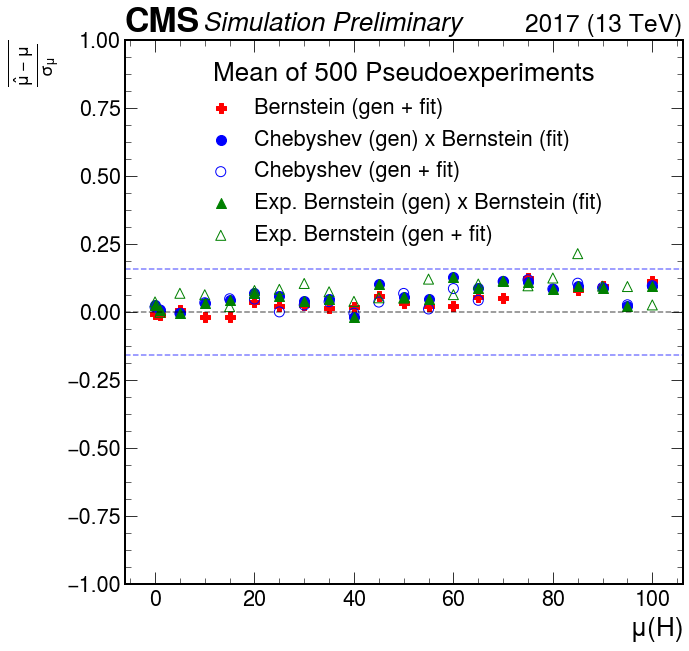

In [34]:
mus = [0, 1] + range(5, 105, 5)
means_nom = []
means_ref = []
means_alt = []
base_name = 'bias'
year = '17'
for mu in mus:
    means_ref.append(np.mean(get_bias('Ref{}/{}_baseRef{}CC_{}_0-20-1.root'.format(year, base_name, year, mu), mu)))
    means_alt.append(np.mean(get_bias('Ref{}CC/{}_alt_{}_0-20-1.root'.format(year, base_name, mu), mu)))
    try:
        means_nom.append(np.mean(get_bias('Ref{}/bias{}.root'.format(year, mu), mu)))
    except:
        means_nom.append(np.nan)

fig, ax = plt.subplots()  
plt.scatter(mus, means_nom, label='Bernstein (gen + fit)', color='red', s=100, marker='P')
plt.scatter(mus, means_ref, label='Chebyshev (gen) x Bernstein (fit)', color='blue', s=100)
plt.scatter(mus, means_alt, label='Chebyshev (gen + fit)', color='blue', s=100, facecolors='none')

means_ref = []
means_alt = []
for mu in mus:
    means_ref.append(np.mean(get_bias('Ref{}/{}_baseRef{}tt_{}_0-20-1.root'.format(year, base_name, year, mu), mu)))
    means_alt.append(np.mean(get_bias('Ref{}tt/{}_alt_{}_0-20-1.root'.format(year, base_name, mu), mu)))
    
plt.scatter(mus, means_ref, label='Exp. Bernstein (gen) x Bernstein (fit)', color='green', marker='^', s=100)
plt.scatter(mus, means_alt, label='Exp. Bernstein (gen + fit)', color='green', marker='^', s=100, facecolors='none')

plt.ylim(-1, 1)
plt.axhline(0, color='black', ls='--', alpha=0.5)
plt.xlabel("$\mu(H)$", x=1, ha='right')
plt.ylabel(r"$\overline{\frac{\hat{\mu}-\mu}{\sigma_\mu}}$", y=1, ha='right')
plt.legend(title='Mean of 500 Pseudoexperiments', loc='upper center')
plt.axhline(.16, ls='--', color='b', alpha=0.5)
plt.axhline(-.16, ls='--', color='b', alpha=0.5)
hep.cms.label(data=False, year='20'+year)
fig.savefig('bplots/bias_17_altfits_MC.png', transparent=True, dpi=300, bbox_inches='tight')
fig.savefig('bplots/bias_17_altfits_MC.pdf', transparent=True, dpi=300, bbox_inches='tight')

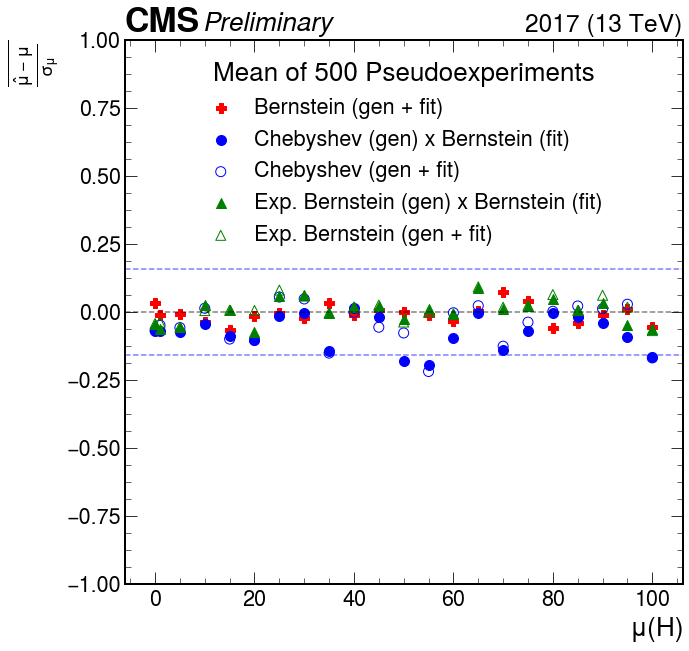

In [13]:
mus = [0, 1] + range(5, 105, 5)
means_nom = []
means_ref = []
means_alt = []
base_name = 'bias_toysF'
year = '17'
for mu in mus:
    means_ref.append(np.mean(get_bias('Ref{}/{}_baseRef{}CC_{}_0-20-1.root'.format(year, base_name, year, mu), mu)))
    means_alt.append(np.mean(get_bias('Ref{}CC/{}_alt_{}_0-20-1.root'.format(year, base_name, mu), mu)))
    try:
        means_nom.append(np.mean(get_bias('Ref{}/{}{}.root'.format(year, 'biastfFr', mu), mu)))
    except:
        means_nom.append(np.nan)

fig, ax = plt.subplots()  
plt.scatter(mus, means_nom, label='Bernstein (gen + fit)', color='red', s=100, marker='P')
plt.scatter(mus, means_ref, label='Chebyshev (gen) x Bernstein (fit)', color='blue', s=100)
plt.scatter(mus, means_alt, label='Chebyshev (gen + fit)', color='blue', s=100, facecolors='none')

means_ref = []
means_alt = []
for mu in mus:
    means_ref.append(np.mean(get_bias('Ref{}/{}_baseRef{}tt_{}_0-20-1.root'.format(year, base_name, year, mu), mu)))
    means_alt.append(np.mean(get_bias('Ref{}tt/{}_alt_{}_0-20-1.root'.format(year, base_name, mu), mu)))
    
plt.scatter(mus, means_ref, label='Exp. Bernstein (gen) x Bernstein (fit)', color='green', marker='^', s=100)
plt.scatter(mus, means_alt, label='Exp. Bernstein (gen + fit)', color='green', marker='^', s=100, facecolors='none')

plt.ylim(-1, 1)
plt.axhline(0, color='black', ls='--', alpha=0.5)
plt.xlabel("$\mu(H)$", x=1, ha='right')
plt.ylabel(r"$\overline{\frac{\hat{\mu}-\mu}{\sigma_\mu}}$", y=1, ha='right')
plt.legend(title='Mean of 500 Pseudoexperiments', loc='upper center')
plt.axhline(.16, ls='--', color='b', alpha=0.5)
plt.axhline(-.16, ls='--', color='b', alpha=0.5)
hep.cms.label(data=True, year='20'+year)
fig.savefig('bplots/bias_17_altfits_tffreeze.png', transparent=True, dpi=300, bbox_inches='tight')
fig.savefig('bplots/bias_17_altfits_tffreeze.pdf', transparent=True, dpi=300, bbox_inches='tight')

In [28]:
def get_bias(fname, val=1):
    rfile = r.TFile.Open(fname)
    rtree = rfile.Get("limit")
    records = {}
    for i in range(rtree.GetEntries()):
        rtree.GetEntry(i)
        _id = "{}_{}".format(rtree.iSeed, rtree.iToy)

        if rtree.limitErr != 0:
            records[_id] = (rtree.limit-val)/rtree.limitErr
            
    return np.array(records.values())

get_bias('Ref17/higgsCombinebla.FitDiagnostics.mH120.123456.root')

array([2.07784409, 2.66839424, 2.41720858, 3.11101612, 2.11564367])

In [26]:
comb_file = r.TFile.Open('Ref17/fd_tf.root')
comb_file2 = r.TFile.Open('Ref17/fd_t.root')

In [27]:
toys = comb_file2.Get('toys')
toys.ls()

TDirectoryFile*		toys	toys
 KEY: RooDataSet	toy_1;1	
 KEY: RooArgSet	toy_1_snapshot;1	Set of RooAbsArg objects
 KEY: RooDataSet	toy_2;1	
 KEY: RooArgSet	toy_2_snapshot;1	Set of RooAbsArg objects
 KEY: RooDataSet	toy_3;1	
 KEY: RooArgSet	toy_3_snapshot;1	Set of RooAbsArg objects
 KEY: RooDataSet	toy_4;1	
 KEY: RooArgSet	toy_4_snapshot;1	Set of RooAbsArg objects
 KEY: RooDataSet	toy_5;1	
 KEY: RooArgSet	toy_5_snapshot;1	Set of RooAbsArg objects


In [28]:
toys.Get('toy_1').Print()

RooDataSet::model_sData[onebin,msd,CMS_channel,weight:_weight_] = 278 entries (4.26847e+06 weighted)


[#1] INFO:InputArguments -- RooAbsData::plotOn(model_sData) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


Warning in <TCanvas::Constructor>: Deleting canvas with same name: some


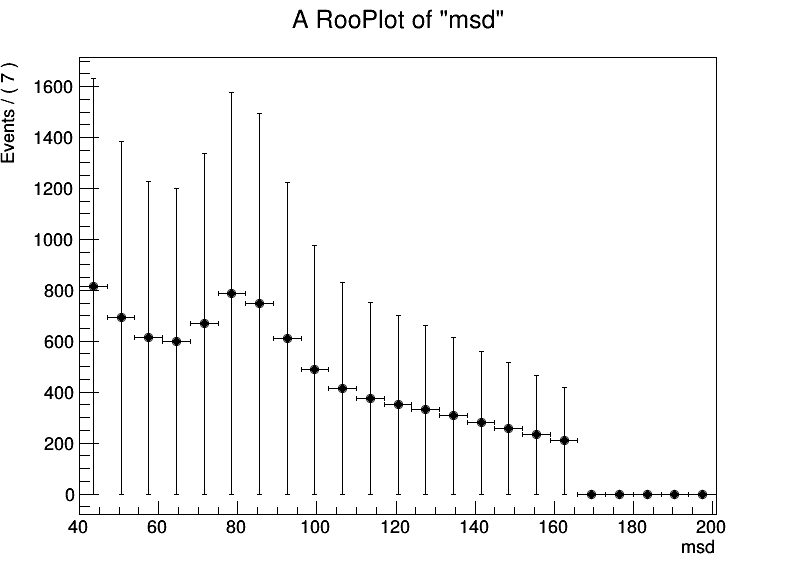

In [43]:
canv = r.TCanvas("some","The Canvas Title",800,600)
canv.cd()
w = comb_file.Get('w')
x = w.var('msd')
frame = x.frame()

comb_file.Get('toys').Get('toy_asimov').reduce("CMS_channel==CMS_channel::ptbin0pass2017").plotOn(frame)
frame.Draw()
canv.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: some


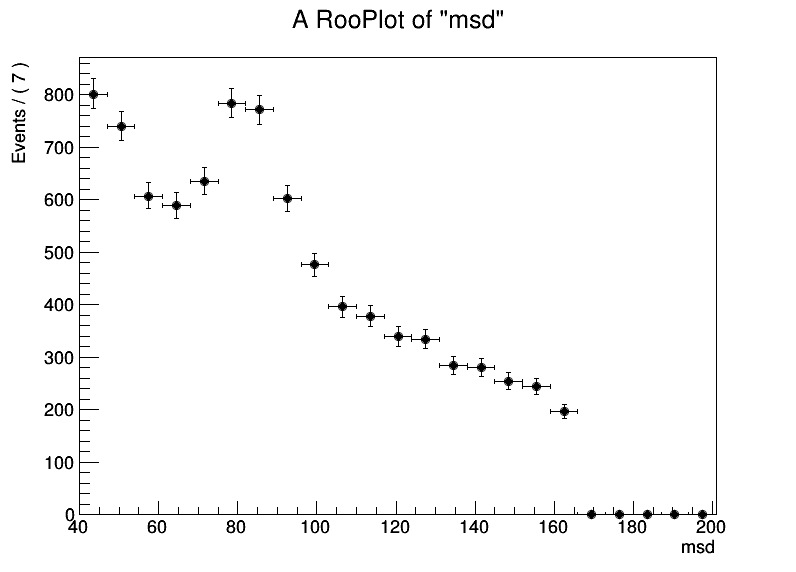

In [41]:
canv = r.TCanvas("some","The Canvas Title",800,600)
canv.cd()
w = comb_file.Get('w')
x = w.var('msd')
frame = x.frame()

comb_file2.Get('toys').Get('toy_5').reduce("CMS_channel==CMS_channel::ptbin0pass2017").plotOn(frame)
frame.Draw()
canv.Draw()